In [ ]:
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from copy import copy, deepcopy
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt
import PIL
import re
import numpy as np
import pandas as pd
from osgeo import gdal
import os
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from IPython import display
from keras.preprocessing.image import img_to_array, load_img
import os

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = "/content/drive/MyDrive/cloud_removal_1"

In [ ]:
true_dir = os.path.join(root_path, 'data', 'true')
false_dir = os.path.join(root_path, 'data', 'false')

In [ ]:
# Function to load images from a directory
def load_images(directory, target_size=(2448, 2448)):
    images = []
    for filename in os.listdir(directory):
        # Load image
        img = load_img(os.path.join(directory, filename), target_size=target_size)
        # Convert image to array
        img_array = img_to_array(img)
        # Append to list of images
        images.append(img_array)
    # Concatenate images into a single array
    images = np.concatenate(images, axis=0)
    return images

In [ ]:
true_images = load_images(true_dir)
false_images = load_images(false_dir)

In [ ]:
train_img = np.array(true_images)
test_img = np.array(false_images)

In [ ]:
train_img.shape, test_img.shape

((2448, 2448, 3), (2448, 2448, 3))

In [ ]:
#preserving the original train and test variable buckets for validation
temp_train = train_img
temp_test = test_img

#resizing/normalizing the pixel values within unity
temp_train = temp_train/temp_train.max()
temp_test = temp_test/temp_test.max()

#re-normalizing to convert negative values into positive values
temp_train = (temp_train + 1)/2
temp_test = (temp_test + 1)/2

In [ ]:
temp_train.shape

(2448, 2448, 3)

Text(0.5, 1.0, 'Cloudy image (2448)')

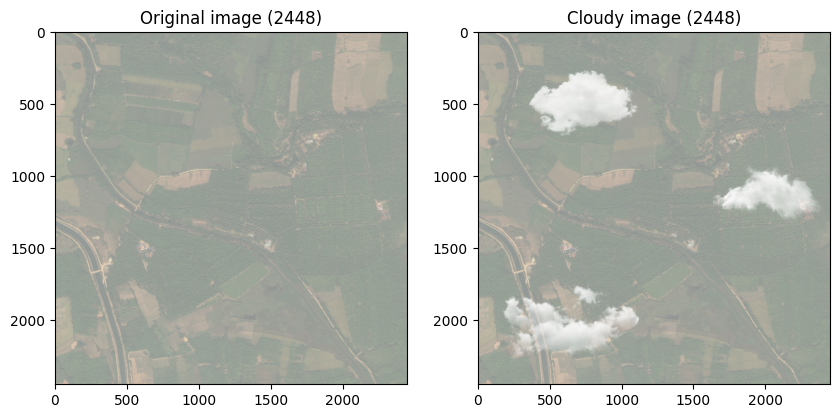

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(temp_train)
plt.title("Original image (2448)")
plt.subplot(122)
plt.imshow(temp_test)
plt.title("Cloudy image (2448)")

In [ ]:
temp_train = temp_train[:1024, :1024, :]
temp_test = temp_test[:1024, :1024, :]

In [ ]:
temp_train.shape

(1024, 1024, 3)

In [ ]:
temp_test[:,:,:0].shape

(1024, 1024, 0)

Text(0.5, 1.0, 'Cloudy resized image (1024)')

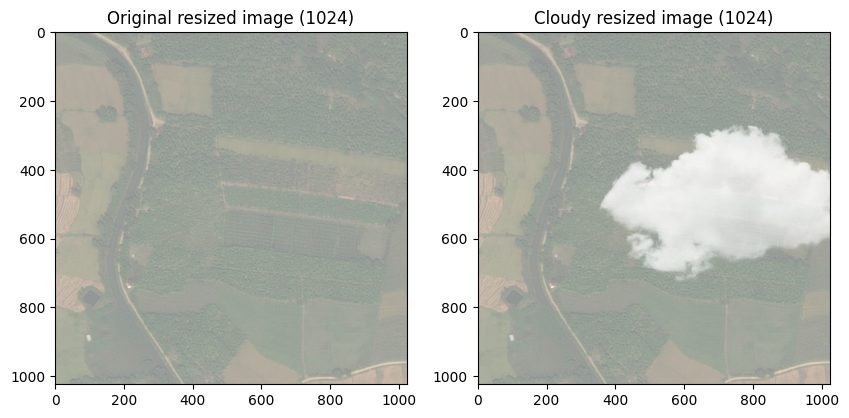

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(temp_train)
plt.title("Original resized image (1024)")
plt.subplot(122)
plt.imshow(temp_test)
plt.title("Cloudy resized image (1024)")

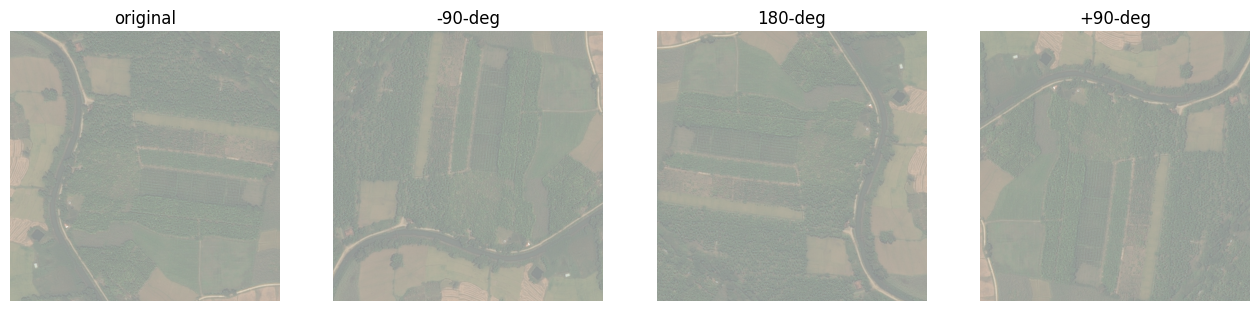

In [ ]:

#----------training stack-------------#
tem1 = deepcopy(temp_train)
# -------- MY NEW APPROACH -----------------#
# #no skew
# tem3 = deepcopy(temp_train)

# #90 deg clockwise
# tem4 = deepcopy(temp_train)
# tem4 = np.rot90(tem4, axes=(1,0))

# #90 deg anti-clockwise
# tem5 = deepcopy(temp_train)
# tem5 = np.rot90(tem5, axes=(0,1))

# #180 deg
# #rotate 180 deg clockwise/anti-clockwise
# tem6 = deepcopy(temp_train)
# tem6 = np.rot90(tem6, axes=(1,0))
# tem6 = np.rot90(tem6, axes=(1,0))
# ------------------------------------------#

# ---------- REFERENCE CODE APPROACH --------#
tem3=np.rot90(tem1)
tem4=np.rot90(tem1, 2)
tem5=np.rot90(tem1, 3)
# -------------------------------------------#

#displaying the distinct images of the training stack
fig, a = plt.subplots(1,4, figsize=(16,4))

a[0].imshow(tem1)
a[0].set_title('original')
a[0].axis('off')

a[1].imshow(tem3)
a[1].set_title('-90-deg')
a[1].axis('off')

a[2].imshow(tem4)
a[2].set_title('180-deg')
a[2].axis('off')

a[3].imshow(tem5)
a[3].set_title('+90-deg')
a[3].axis('off')

plt.show()

In [ ]:
#stacking the augmented TRUE images
train_stack = np.stack((tem3, tem4, tem5, tem3, tem4, tem5, tem3, tem4, tem5, tem3), axis=0)
print(train_stack.shape)

#saving the training set on disk
np.save(root_path + '/data/train_data_3_10copy', train_stack)

(10, 1024, 1024, 3)


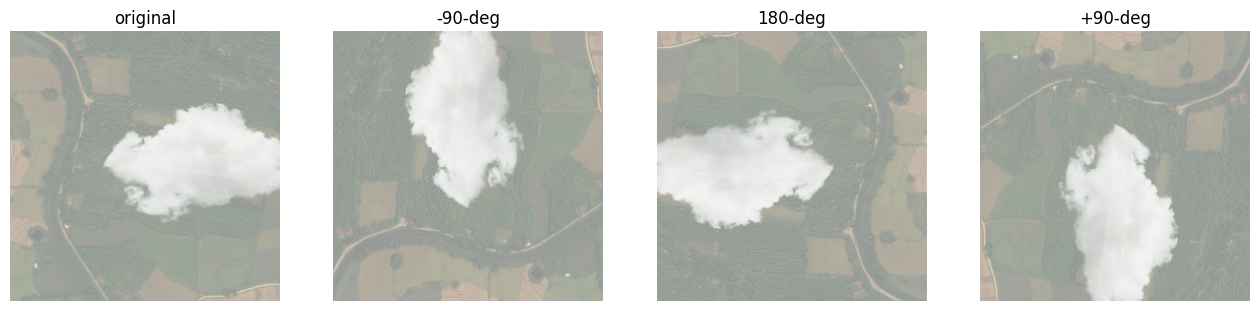

In [ ]:
#----------testing stack-------------#
tem2 = deepcopy(temp_test)
# # -------- MY NEW APPROACH -----------------#
# #no skew
# tem7 = deepcopy(temp_test)

# #90 deg clockwise
# tem8 = deepcopy(temp_test)
# tem8 = np.rot90(tem8, axes=(1,0))

# #90 deg anti-clockwise
# tem9 = deepcopy(temp_test)
# tem9 = np.rot90(tem9, axes=(0,1))

# #180 deg
# #rotate 180 deg clockwise/anti-clockwise
# tem10 = deepcopy(temp_test)
# tem10 = np.rot90(tem10, axes=(1,0))
# tem10 = np.rot90(tem10, axes=(1,0))
# # ------------------------------------------#

# ---------- REFERENCE CODE APPROACH --------#
tem6=np.rot90(tem2)
tem7=np.rot90(tem2, 2)
tem8=np.rot90(tem2, 3)
# -------------------------------------------#

#displaying the distinct images of the training stack
fig, a = plt.subplots(1,4, figsize=(16,4))


a[0].imshow(tem2)
a[0].set_title('original')
a[0].axis('off')

a[1].imshow(tem6)
a[1].set_title('-90-deg')
a[1].axis('off')

a[2].imshow(tem7)
a[2].set_title('180-deg')
a[2].axis('off')

a[3].imshow(tem8)
a[3].set_title('+90-deg')
a[3].axis('off')

plt.show()

In [ ]:
#stacking the augmented FALSE images
train_stack = np.stack((tem6, tem7, tem8, tem6, tem7, tem8, tem6, tem7, tem8, tem6), axis=0)
print(train_stack.shape)

#saving the testing set on disk
np.save(root_path + '/data/test_data_3_10copy', train_stack)

(10, 1024, 1024, 3)


In [ ]:
import numpy as np

#loading test data
src_data = np.load(root_path + '/data/test_data_3_10copy.npy')
#src_data = np.load(root_path + '/data/test_data_4_10copy.npy')

#loading train data
tar_data = np.load(root_path + '/data/train_data_3_10copy.npy')
#tar_data = np.load(root_path + '/data/train_data_4_10copy.npy')

print("Train data shape: ", src_data.shape)
print("Test data shape: ", tar_data.shape)

Train data shape:  (10, 1024, 1024, 3)
Test data shape:  (10, 1024, 1024, 3)


In [ ]:
#pix2pix GAN model Architecture

In [ ]:
#Discriminator Model
'''
This function portrays the discriminator model based on the image dimensions
args --> image_shape: (x,y) for 2d; (x,y,d) for 3d
'''
def define_discriminator(image_shape):
    init = RandomNormal(stddev=0.02)
    in_src_image = Input(shape=image_shape)
    # target image input
    in_target_image = Input(shape=image_shape)

    merged = Concatenate()([in_src_image, in_target_image])

    # C64
    d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
    d = LeakyReLU(alpha=0.2)(d)

    # C128
    d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)

    # C256
    d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)

    # C512
    d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)
    d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
    d = BatchNormalization()(d)
    d = LeakyReLU(alpha=0.2)(d)

  # patch output
    d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
    patch_out = Activation('sigmoid')(d)

  # define model
    model = Model([in_src_image, in_target_image], patch_out)

  # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])

    return model


In [ ]:
#ENCODER BLOCK
'''
This function protrays the architecture of an encoder block
'''

def define_encoder_block(layer_in, n_filters, batchnorm=True):

   # weight initialization
    init = RandomNormal(stddev=0.02)

    #add downsampling layer
    g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)  	# add downsampling layer

  # conditionally add batch normalization
    if batchnorm:
        g = BatchNormalization()(g, training=True)

  #Activating Leaky RelU
    g = LeakyReLU(alpha=0.2)(g)
    return g

In [ ]:
# DECODER BLOCK
'''
This function portrays the architecture of a decoder block
'''

def decoder_block(layer_in, skip_in, n_filters, dropout=True):
    #weight initialization
    init = RandomNormal(stddev=0.02)

    #add upsampling layer
    g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)

    #add batch normalization
    g = BatchNormalization()(g, training=True)

    # conditionally add dropout
    if dropout:
        g = Dropout(0.5)(g, training=True)

    # merge with skip connection
    #basically we concatenate the layers produced by (upconvolution) and the original layer in encoder block
    g = Concatenate()([g, skip_in])

    # relu activation
    g = Activation('relu')(g)
    return g

In [ ]:
#Generator Model
'''
This function portrays the generator model based on the image dimensions
args --> image_shape: (x,y) for 2d; (x,y,d) for 3d
'''

def define_generator(image_shape=(256,256,3)):

  # weight initialization
    init = RandomNormal(stddev=0.02)

  # image input
    in_image = Input(shape=image_shape)

  # encoder model
    e1 = define_encoder_block(in_image, 64, batchnorm=False)
    e2 = define_encoder_block(e1, 128)
    e3 = define_encoder_block(e2, 256)
    e4 = define_encoder_block(e3, 512)
    e5 = define_encoder_block(e4, 512)
    e6 = define_encoder_block(e5, 512)
    e7 = define_encoder_block(e6, 512)

    # bottleneck, no batch norm and relu
    b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
    b = Activation('relu')(b)

    # decoder model
    d1 = decoder_block(b, e7, 512)
    d2 = decoder_block(d1, e6, 512)
    d3 = decoder_block(d2, e5, 512)
    d4 = decoder_block(d3, e4, 512, dropout=False)
    d5 = decoder_block(d4, e3, 256, dropout=False)
    d6 = decoder_block(d5, e2, 128, dropout=False)
    d7 = decoder_block(d6, e1, 64, dropout=False)

    # output
    g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
    out_image = Activation('tanh')(g)

    # define model
    model = Model(in_image, out_image)

    return model

In [ ]:
#Combining the Discriminator and Generator model to form the GAN

In [ ]:
# Combine generator and Discriminator Model
'''
This function portrays the proposed GAN architecture
args--> generator model, discriminator model, image shape
'''

def define_gan(g_model, d_model, image_shape):

    # make weights in the discriminator not trainable
    d_model.trainable = False

    # define the source image
    in_src = Input(shape=image_shape)

    # connect the source image to the generator input
    gen_out = g_model(in_src)

    # connect the source input and generator output to the discriminator input
    dis_out = d_model([in_src, gen_out])

    # src image as input, generated image and classification output
    model = Model(in_src, [dis_out, gen_out])

    # compile model
    opt = Adam(learning_rate = 0.00002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])

    return model

In [ ]:
#Selecting and Generating Batch of Samples
#5.1.2 Function to Generate Real Samples
'''
This functions selects a batch of random samples and returns an image with its target
args --> image_stack, number of samples, patch shape
'''

def generate_real_samples(dataset, n_samples, patch_shape):

    # unpack dataset
    trainA, trainB = dataset

    # choose random instances
    ix = randint(0, trainA.shape[0], n_samples)

    # retrieve selected images
    X1, X2 = trainA[ix], trainB[ix]

    # generate 'real' class labels (1)
    y = ones((n_samples, patch_shape, patch_shape, 1))

    return [X1, X2], y

In [ ]:
#Function to Generate Fake Samples

# generate a batch of images, returns images and targets
'''
This function uses the generator model to generate fake samples
args --> generator model, number of samples, patch shape
'''

def generate_fake_samples(g_model, samples, patch_shape):

    # generate fake instance
    X = g_model.predict(samples)
    # create 'fake' class labels (0)
    y = zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

In [ ]:
#Generating Samples and Model Epoch Utility Functions

#Epoch operations to summarize model performance
'''
This function generates sample to pass on to the GAN, and creates the plot at 100X epochs with the src, tar and generated image
args --> epoch step, generator model, dataset, number of samples
'''

def summarize_performance(step, g_model, dataset, n_samples=3):

    # select a sample of input images
    [X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)

    # generate a batch of fake samples
    X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)

    # scale all pixels from [-1,1] to [0,1]
    X_realA = (X_realA + 1) / 2.0
    X_realB = (X_realB + 1) / 2.0
    X_fakeB = (X_fakeB + 1) / 2.0

    # plot real source images
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realA[i])

  # plot generated target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples + i)
        pyplot.axis('off')
        pyplot.imshow(X_fakeB[i])

  # plot real target image
    for i in range(n_samples):
        pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
        pyplot.axis('off')
        pyplot.imshow(X_realB[i])

  # save plot to file
    filename1 = 'plot_%06d.png' % (step+1)
    pyplot.savefig(filename1)
    pyplot.close()

  # save the generator model
    filename2 = 'model_%06d.h5' % (step+1)
    g_model.save(filename2)
    print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
#Function to Train the Model
'''
This function is for training the model based on the pixel-to-pixel architecture to achieve image to image tramslation using GAM
args --> discriminator model, generator model, GAN model, train/test set, number of epochs, number of train batches/batch size
'''

def train(d_model, g_model, gan_model, dataset, n_epochs=200, n_batch=1):

  # determine the output square shape of the discriminator
    n_patch = d_model.output_shape[1]

  # unpack dataset
    trainA, trainB = dataset

  # calculate the number of batches per training epoch
    bat_per_epo = int(len(trainA) / n_batch)

  # calculate the number of training iterations
    n_steps = bat_per_epo * n_epochs

  #log all losses
    d_loss1_log = []
    d_loss2_log = []
    g_loss_log = []

  # manually enumerate epochs
    for i in range(n_steps):
    # select a batch of real samples
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)

    # generate a batch of fake samples
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)

    # update discriminator for real samples
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        d_loss1_log.append(d_loss1)

    # update discriminator for generated samples
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        d_loss2_log.append(d_loss2)

    # update the generator
        g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        g_loss_log.append(g_loss)

    # summarize performance - plot loss per epoch

        plt.clf()
        plt.figure(figsize=(20,12))
        plt.title('Epoch:%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
        plt.xlabel('Epoch', fontsize=16)
        plt.ylabel('Loss', fontsize=16)
        plt.plot(d_loss1_log, 'r-', lw=2, label='d_loss1')
        plt.plot(d_loss2_log, 'b-', lw=1, label='d_loss2')
        plt.plot(g_loss_log, 'g-', lw=1, label='g_loss')
        plt.legend(prop={'size':16}, loc="upper right")
        display.clear_output(wait=True)
        display.display(plt.gcf())
        print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))

    # summarize model performance
        if (i+1) % (bat_per_epo * 10) == 0:
            plt.savefig('./loss_graph_%06d.jpg' % (i+1), bbox_inches='tight')
            summarize_performance(i, g_model, dataset)

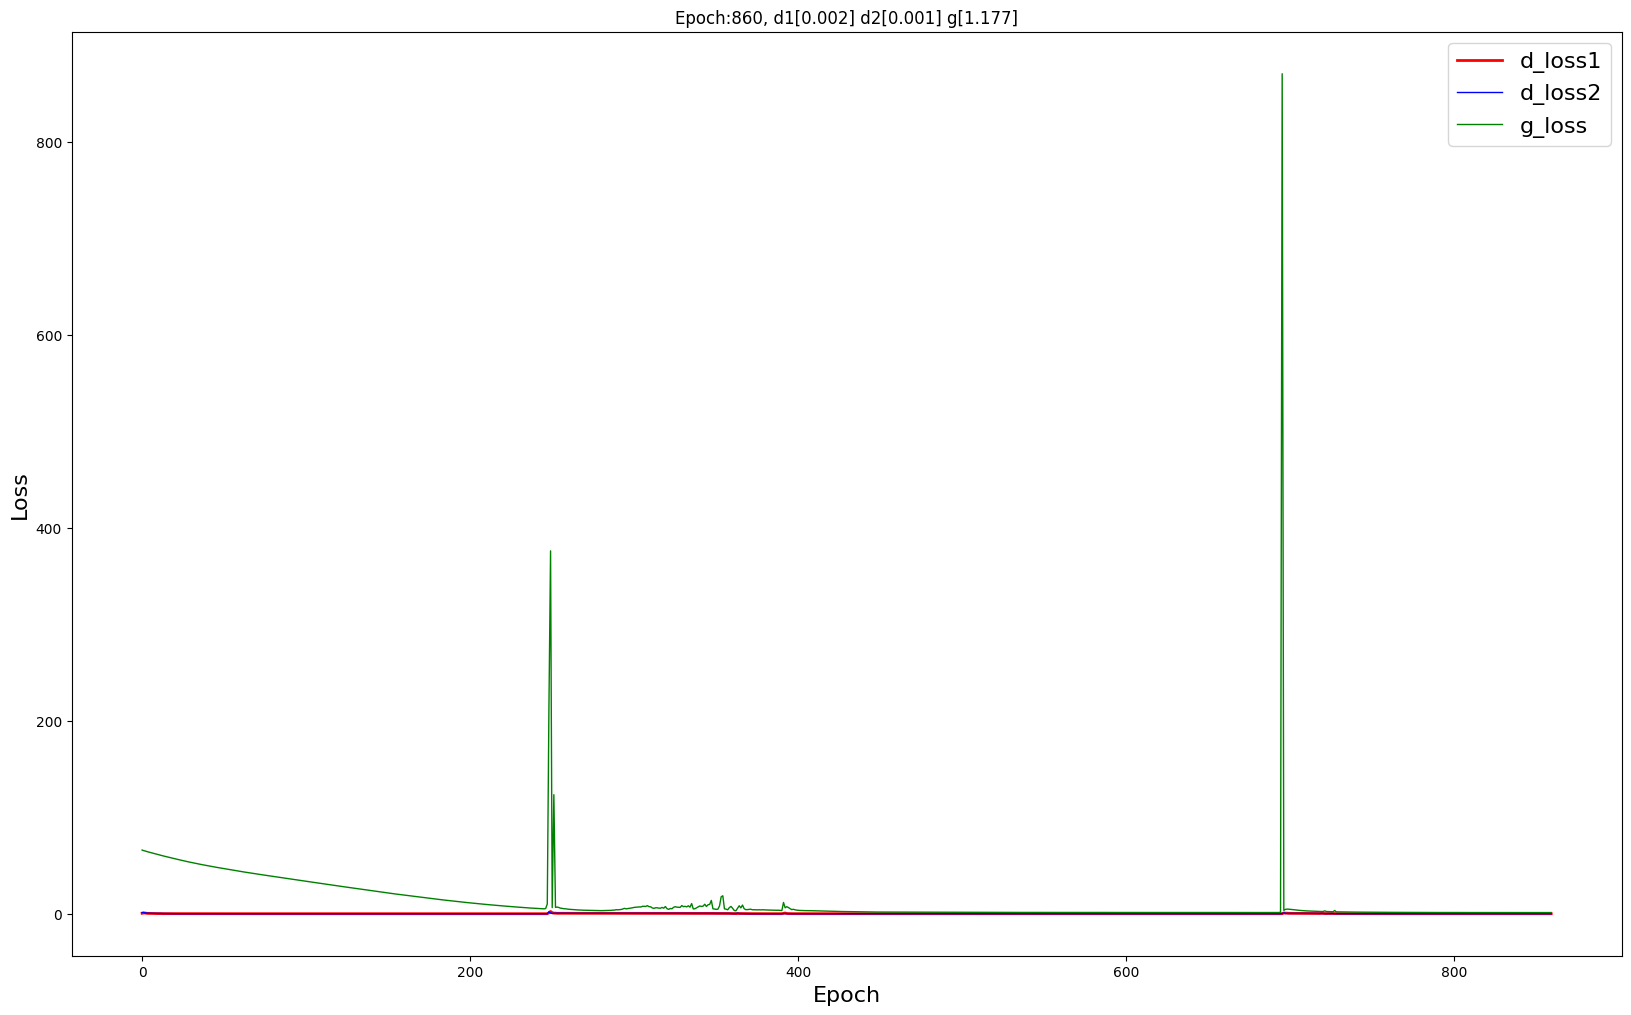

>860, d1[0.002] d2[0.001] g[1.177]
1/1 [==============================] - 0s 31ms/step


In [ ]:
#Training the Model - This will train the model and save the model at each 100 epochs on disk.

dataset=(src_data,tar_data)
print('loaded - ', src_data.shape, tar_data.shape)

# define input shape based on the loaded dataset
image_shape=src_data.shape[1:]

# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)

# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

# train model
train(d_model, g_model, gan_model, dataset, n_epochs=200)


In [ ]:
#Pedicting the cloud free image

from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
import os

In [ ]:
# load and prepare training images
'''
This function reads the stacked array dataset and returns the TRUE and FALSE images in a single list
args --> filename/ file location (abs path | rel path)
'''

def load_real_samples(filename):
  # load compressed arrays
  #data = load(filename)
  # unpack arrays
  #X1, X2 = data['arr_0'], data['arr_1']
    X1=data1
    X2=data2
  # scale from [0,255] to [-1,1]
  #X1 = (X1 - 127.5) / 127.5
  #X2 = (X2 - 127.5) / 127.5
    X1=X1.astype('uint16')
    X2=X2.astype('uint16')
    return [X1, X2]

In [ ]:
#Plot Images
'''
This function plots the three images in a matplot
'''
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))

    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0

    titles = ['Source', 'Generated', 'Expected']

    #drawing the plot
    fig, a = plt.subplots(1,3, figsize=(16,4))

    # plot images row by row in subplot
    for i in range(len(images)):
      # show image
      a[i].imshow(images[i])

      # set title
      a[i].set_title(titles[i])

      # turn off axis
      a[i].axis('off')
    plt.show()

Loaded (10, 1024, 1024, 3) (10, 1024, 1024, 3)


1/1 [==============================] - 6s 6s/step


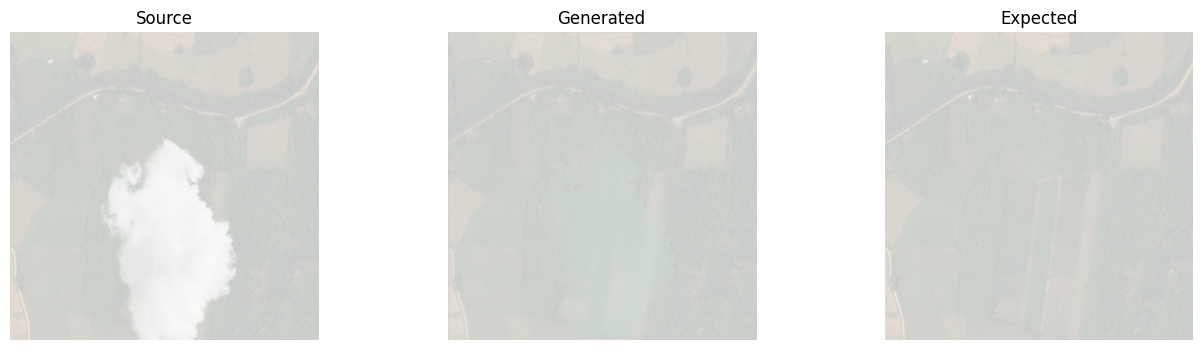

In [ ]:
X1,X2=src_data,tar_data
print('Loaded', X1.shape, X2.shape)
# load model
model = load_model('/content/drive/MyDrive/cloud_removal_model/model_000800.h5')

ix = randint(0, len(X1), 1)
src_image, tar_image =np.copy(src_data[ix]), np.copy(tar_data[ix])

#Generate the image
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)

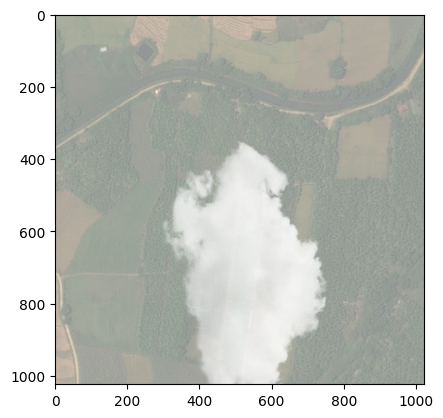

In [ ]:
plt.imshow(src_image[0])

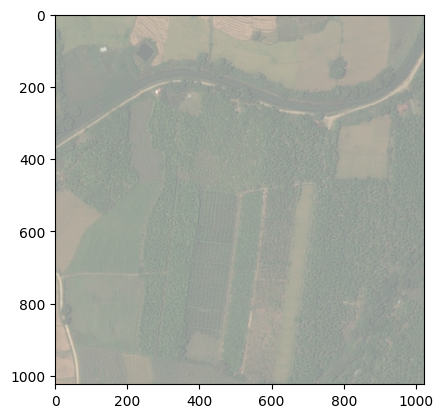

In [ ]:
plt.imshow(tar_image[0])

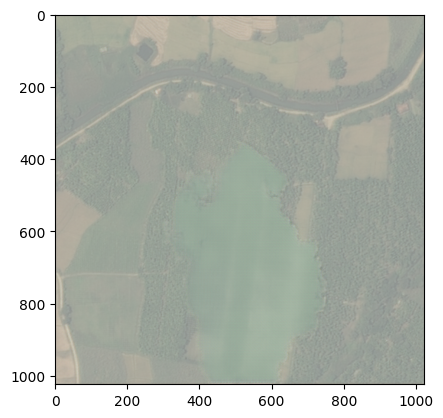

In [ ]:
plt.imshow(gen_image[0])

TypeError: imsave() missing 1 required positional argument: 'arr'